<a href="https://colab.research.google.com/github/MbogoriL/RNN/blob/main/Recurrent_Neural_Networks_with_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#2F4F4F'>AfterWork Data Science: Recurrent Neural Networks with Python - Project</font>

## <font color='#2F4F4F'>Step 1. Business Understanding </font>

### a) Specifying the Research Question

Build a recurrent neural networks model that will be used to predict Tesla stock prices in 2017 using data from 2012-2016

### b) Defining the Metric for Success

Build a neural networks regression model with an RSME  less than 10% of the target mean.

### c) Understanding the Context 

Stockpy is an innovative fintech enabling financial prosperity for the entire population. It is a venture funded startup based in Palo Alto bringing world-class financial experiences to a continually growing customer base. As Stockpy enters an expansion phase for innovative fintech product offerings, it aims to enhance the enormous value in data processing and analysis for continuous growth and success.

As a Finance Data Scientist for Stockpy, you provide leadership to turn cutting-edge technology into actionable insights; unlocking the power of data that provides value to business decisions and customer service enhancements.

### d) Recording the Experimental Design

* Business Understanding
* Data Exploration
* Data Preparation
* Data Modeling and Evaluation
* Summary of Findings and Recommendation
* Challenging the Solution


## <font color='#2F4F4F'>Step 2. Data Importation</font>

In [1]:
# Importing standard libraries
# ---
# 
import pandas as pd
import numpy as np

In [2]:
# Importing our dataset
# ---
#
train = pd.read_csv('https://bit.ly/38dSbSb')
test = pd.read_csv('https://bit.ly/3kW8E0K')

train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,5.788,5.900,5.530,5.616,5.616,4640500
1,2012-01-04,5.642,5.734,5.500,5.542,5.542,3150500
2,2012-01-05,5.552,5.586,5.370,5.424,5.424,5027500
3,2012-01-06,5.440,5.558,5.282,5.382,5.382,4931500
4,2012-01-09,5.400,5.498,5.224,5.450,5.450,4485000


## <font color='#2F4F4F'>Step 3. Data Exploration</font>

In [3]:
# Sample dataset
# ---
#
print("Number of records in the train dataset:", train.shape)
print("Number of records in the test dataset:", test.shape)

train.sample(5)

Number of records in the train dataset: (1258, 7)
Number of records in the test dataset: (212, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
699,2014-10-14,45.650002,46.493999,44.599998,45.411999,45.411999,35526500
586,2014-05-05,41.896000,43.537998,41.703999,43.321999,43.321999,25735000
254,2013-01-08,6.900000,6.900000,6.622000,6.736000,6.736000,6420000
936,2015-09-23,52.389999,52.416000,51.515999,52.212002,52.212002,13004000
100,2012-05-25,6.032000,6.082000,5.840000,5.962000,5.962000,3785000


In [4]:
# Statistical summary
# ---
#
train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,31.997898,32.558671,31.403696,31.989245,31.989245,2.551310e+07
std,16.911515,17.148543,16.649245,16.903500,16.903500,2.259037e+07
min,5.324000,5.370000,4.528000,4.558000,4.558000,1.824500e+06
25%,8.403000,8.556000,8.197000,8.379500,8.379500,1.059400e+07
50%,39.411000,40.123998,38.709000,39.427000,39.427000,2.007650e+07
75%,45.214499,45.934999,44.303000,45.076502,45.076502,3.245150e+07
max,57.534000,58.284000,56.080002,57.208000,57.208000,1.858195e+08


## <font color='#2F4F4F'>Step 4. Data Preparation</font>

In [5]:
# Getting our train dataset
# ---
#
train_set = train.iloc[:, 1:2].values
print(train_set)

[[ 5.788   ]
 [ 5.642   ]
 [ 5.552   ]
 ...
 [44.306   ]
 [43.712002]
 [43.259998]]


In [6]:
# Performing Feature scaling
# ---
#
from sklearn.preprocessing import MinMaxScaler
sc =  MinMaxScaler(feature_range = (0, 1))
train_set_scaled = sc.fit_transform(train_set)
print(train_set_scaled)

[[0.00888719]
 [0.00609079]
 [0.00436698]
 ...
 [0.74663857]
 [0.73526148]
 [0.72660406]]


In [7]:
# Creating a dataset with 60 timesteps and 1 output
# ---
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(train_set_scaled[i-60:i, 0])
    y_train.append(train_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
# Reshaping 
# ---
#
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
print(len(train_set))
len(X_train)

1258


1198

##  <font color='#2F4F4F'>Step 5. Data Modeling</font>

In [10]:
# Building the RNN
# ---
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [11]:
# Initialising the RNN
regressor = Sequential()

# Adding 4 LSTM layers and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))


# Adding the output layer
# ---
#
regressor.add(Dense(units = 1))

In [12]:
# Compile the RNN 
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [13]:
# Fitting the RNN to the training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 15s 16ms/step - loss: 0.0447
Epoch 2/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0087
Epoch 3/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0081
Epoch 4/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0072
Epoch 5/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0074
Epoch 6/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0064
Epoch 7/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0064
Epoch 8/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0064
Epoch 9/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0059
Epoch 10/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0054
Epoch 11/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0052
Epoch 12/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0054
Epoch 13/100
38/38 [====

In [14]:
real_stock_price = test.iloc[:, 1:2].values
print(real_stock_price)

[[ 88.094002]
 [ 92.279999]
 [ 94.739998]
 [ 99.419998]
 [ 96.358002]
 [ 98.699997]
 [108.851997]
 [105.952003]
 [ 98.75    ]
 [101.522003]
 [106.050003]
 [114.377998]
 [112.849998]
 [114.125999]
 [108.398003]
 [113.697998]
 [115.138   ]
 [126.484001]
 [128.      ]
 [134.738007]
 [176.591995]
 [164.651993]
 [139.983994]
 [146.110001]
 [160.      ]
 [153.757996]
 [155.574005]
 [148.367996]
 [157.444   ]
 [168.320007]
 [184.699997]
 [182.389999]
 [181.395996]
 [167.800003]
 [169.800003]
 [156.5     ]
 [146.      ]
 [125.940002]
 [142.251999]
 [161.      ]
 [152.792007]
 [144.753998]
 [138.      ]
 [121.078003]
 [131.886002]
 [128.039993]
 [116.178001]
 [119.      ]
 [ 93.900002]
 [ 88.001999]
 [ 77.800003]
 [ 74.940002]
 [ 87.639999]
 [ 86.720001]
 [ 95.459999]
 [109.050003]
 [109.477997]
 [101.      ]
 [102.052002]
 [100.25    ]
 [100.800003]
 [ 96.206001]
 [101.900002]
 [102.239998]
 [109.      ]
 [110.839996]
 [112.417999]
 [118.031998]
 [139.794006]
 [148.399994]
 [143.388   ]
 [154.

In [22]:
# Getting the Predicted Stock Price of 2017
# ---
# We need to concatenate the train and test datasets for prediction, 
# because we use the previous 60 days' stock prices to predict the next-day price. 
# i.e. we need the 60 days' price before the 1st date in the test dataset.
# ---
#
dataset_total = pd.concat((train['Open'],
                           test['Open']), axis=0)

# We create the input for prediction, index starting from the 
# date 60 days before the first date in the test dataset.
# ---
#
inputs = dataset_total[len(dataset_total)-len(test)-60:].values

# Reshaping the inputs to have only 1 column
# ---
#
inputs = inputs.reshape(-1, 1)


# Using the scale set by the training set to scale the test inputs
# ---
#
inputs = sc.transform(inputs)

# Then creating the test data structure just as we did for the train dataset
# ---
#
X_test = []
for i in range(60, 272):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],
                    X_test.shape[1], 1))

In [29]:
#the size of the inputs determines the range of values for X_test
print(len(inputs))

272


In [26]:
# Making predictions: Getting the predicted stock price for 2017

predicted_stock_price = regressor.predict(X_test)

# Since we have predicted the scaled values, we reverse those values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[ 43.239258]
 [ 67.910164]
 [ 89.46468 ]
 [ 76.93112 ]
 [ 86.243286]
 [ 80.602585]
 [ 90.640114]
 [100.84279 ]
 [ 87.86363 ]
 [ 86.312454]
 [ 94.18099 ]
 [ 95.96125 ]
 [102.866875]
 [ 90.58116 ]
 [ 99.76704 ]
 [ 87.3595  ]
 [104.828964]
 [ 94.05772 ]
 [113.426254]
 [ 94.98324 ]
 [115.658615]
 [141.2251  ]
 [ 85.78949 ]
 [104.05479 ]
 [128.26608 ]
 [120.652534]
 [101.366455]
 [127.6826  ]
 [ 97.49325 ]
 [138.2045  ]
 [111.55638 ]
 [138.59868 ]
 [104.42031 ]
 [136.74098 ]
 [ 98.321175]
 [142.39912 ]
 [ 89.86906 ]
 [126.380806]
 [ 83.38851 ]
 [139.38461 ]
 [111.560585]
 [ 99.74635 ]
 [112.0519  ]
 [102.96857 ]
 [ 91.82081 ]
 [123.302155]
 [ 88.06516 ]
 [ 94.975006]
 [102.61216 ]
 [ 70.26174 ]
 [ 82.07285 ]
 [ 70.75486 ]
 [ 70.4821  ]
 [ 79.70785 ]
 [ 76.044754]
 [ 82.423996]
 [ 93.24873 ]
 [ 84.34232 ]
 [ 78.45194 ]
 [ 87.63659 ]
 [ 84.75187 ]
 [ 88.90047 ]
 [ 81.902145]
 [ 93.268166]
 [ 87.13687 ]
 [ 98.03836 ]
 [ 91.53854 ]
 [ 96.18049 ]
 [101.061646]
 [123.036156]
 [104.25084 ]
 [104.

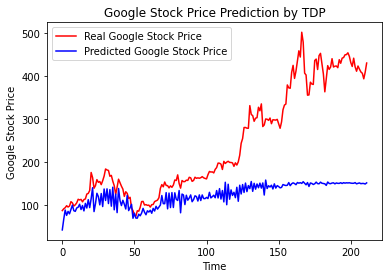

In [27]:
# Visualizing the results
import matplotlib.pyplot as plt

plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue',
         label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction by TDP')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [28]:
# Model Evaluation
# ---
#
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

155.21439172738167


## <font color='#2F4F4F'>Step 6. Summary of Findings and Recommendation</font>

Our model did not perform well as the predicted values had large difference with the real values. The RMSE value is not close to 1.

## <font color='#2F4F4F'>Step 7. Challenging our Solution</font>

#### a) Did we have the right question?

Yes, we have the right question.
#### b) Did we have the right data?
Yes, the data is correct.

#### c) What can be done to improve the solution?
